Just the analysis portion of the homework

Should take in a bunch of 1d arrays including annotator scores and model outputs

In [ ]:
!pip install numpy
!pip install pandas
import csv
import numpy as np
import pandas as pd

In [ ]:
# The following assumes 3 same-length 1d arrays that contain label1, label2, and given model/prompt type output respectively, all values should be integers from 1 to 6
# Can simply run this for each output type (so 3 prompt types * 4 models = 12 runs of this total)
# Returns a ton of metrics to analyze

def calculateMetrics(l1, l2, outputs):
    mapper = {"A1": 1, "A2": 2, "B1": 3, "B2": 4, "C1": 5, "C2": 6, "A1 #END": 1, "A2 #END": 2, "B1 #END": 3, "B2 #END": 4, "C1 #END": 5, "C2 #END": 6} # Used to map values from CEFR levels to integers

    trueCounts = [0, 0, 0, 0, 0, 0] # Stores counts of ground truth values (highest of 2 annotator scores)
    modelCounts = [0, 0, 0, 0, 0, 0] # Stores counts of model outputs
    correctCounts = [0, 0, 0, 0, 0, 0] # Stores counts of correct model outputs
    agreeWithLowerCounts = [0, 0, 0, 0, 0, 0] # Stores counts of "partially correct" model outputs
    trueDisagree = np.zeros((6, 6)) # Stores counts of annotator disagreements (i.e. 1, 5 is count of times annotator 1 said 2, annotator 2 said 6)
    modelDisagree = np.zeros((6, 6)) # Stores counts of annotator/model disagreements (i.e. 0, 5 is count of times annotators said 1, model said 6)
    largeLevelDisagree = np.zeros((3, 3)) # Stores counts of disagreements over level (i.e. 1, 2 is count of times annotators said B and model said C)
    incorrectIndices = [] # Indices of incorrect labels
    disagreeIndices = [] # Indices of annotator disagreement
    correct = 0 # Correct outputs
    agreeWithLower = 0 # Output with lower annotator in cases where annotators disagree
    annotatorDisagree = 0 # Annotators disagree
    oneCorrect = 0 # +- 1 of correct
    twoCorrect = 0 # +- 2 of correct
    threeCorrect = 0 # +- 3 of correct
    fourCorrect = 0 # +- 4 of correct
    withinLetter = 0 # Incorrect within the same letter (by default +- 1 of correct)
    tooHigh = 0 # Too high output
    tooLow = 0  # Too low output
    totalSamples = len(outputs)


    for index in range(len(outputs)): # Main loop
        if outputs[index] == ("A1" or "A1 #END"):
            outputs[index] = 1
        elif outputs[index] == ("A2" or "A2 #END"):
            outputs[index] = 2
        elif outputs[index] == ("B1" or "B1 #END"):
            outputs[index] = 3
        elif outputs[index] == ("B2" or "B2 #END"):
            outputs[index] = 4
        elif outputs[index] == ("C1" or "C1 #END"):
            outputs[index] = 5
        elif outputs[index] == ("C2" or "C2 #END"):
            outputs[index] = 6
        else:
            totalSamples -= 1
            continue

        trueVal = max([l1[index],l2[index]]) # Store true value
        otherVal = min([l1[index],l2[index]]) # Store other value for some calculations
        if l1[index] != l2[index]: # Store inter-annotator disagreement
            trueDisagree[l1[index]-1][l2[index]-1] += 1
            annotatorDisagree += 1
            disagreeIndices.append(index)
        trueCounts[trueVal-1] += 1 # True value stored
        modelCounts[outputs[index]-1] += 1 # Model value stored
        if outputs[index] != trueVal: # Model is wrong
            modelDisagree[trueVal-1][outputs[index]-1] += 1 # Store annotator-model disagreement
            incorrectIndices.append(index)
            if outputs[index] == otherVal: # Store agree with lower
                agreeWithLower += 1
                agreeWithLowerCounts[outputs[index]-1] += 1
            if outputs[index] - trueVal > 0: # Too high of guess by model
                tooHigh += 1
            else: # Too low of guess by model
                tooLow += 1
            if (outputs[index] - trueVal == 1) or (outputs[index] - trueVal == -1): # +-1
                oneCorrect += 1
                if (trueVal == 1 and outputs[index] == 2) or (trueVal == 2 and outputs[index] == 1) or (trueVal == 3 and outputs[index] == 4) or (trueVal == 4 and outputs[index] == 3) or (trueVal == 5 and outputs[index] == 6) or (trueVal == 6 and outputs[index] == 5): # Within level disagreement
                    withinLetter += 1
                else: # Disagreement of level
                    largeLevelDisagree[int((trueVal+1)/2)-1][int((outputs[index]+1)/2)-1] += 1
            elif (outputs[index] - trueVal == 2) or (outputs[index] - trueVal == -2): # +-2
                twoCorrect += 1
            elif (outputs[index] - trueVal == 3) or (outputs[index] - trueVal == -3): # +-3
                threeCorrect += 1
            else: # +-4
                fourCorrect += 1
        else: # Model is right
            correct += 1
            correctCounts[outputs[index]-1] += 1

    metrics = [correct, agreeWithLower, annotatorDisagree, oneCorrect, twoCorrect, threeCorrect, fourCorrect, withinLetter, tooHigh, tooLow, totalSamples]

    return (metrics, trueCounts, modelCounts, correctCounts, agreeWithLowerCounts, trueDisagree, modelDisagree, largeLevelDisagree, incorrectIndices, disagreeIndices)





In [ ]:
# Put the actual analysis stuff here
# Return values from above function are as follows
#  0: Metrics in the order shown above (correct, agreeWithLower, annotatorDisagree, oneCorrect, twoCorrect, threeCorrect, fourCorrect, withinLetter, tooHigh, tooLow, totalSamples)
#  1: Ground truth counts by CEFR level
#  2: Model output counts by CEFR level
#  3: Correct outputs by CEFR level
#  4: Partially correct outputs by CEFR level
#  5: Annotator disagreements in the form (anootator1, annotator2)
#  6: Model/Annotator disagreements in the form (annotators, model)
#  7: Model/Annotator large level disagreements in the form (annotators, model)
#  8: Indices of incorrect outputs in the form [index1, index2, ..., indexn]
#  9: Indices of annotator disagrees in the form [index1, index2, ..., indexn]

df = pd.read_csv("final.csv")
label1 = df['label1']
label2 = df['label2']
chatGPT = df['0s_chatGPT']
Llama1b0s = df['0s_1B']
Llama1b1s = df['1s_1B']
Llama1bcot = df['cot_1B']
Llama3b0s = df['0s_3B']
Llama3b1s = df['1s_3B']
Llama3bcot = df['cot_3B']
Llama8b0s = df['0s_8B']
Llama8b1s = df['1s_8B']
Llama8bcot = df['cot_8B']


df = pd.DataFrame(columns=['correct', 'agreeWithLower', 'annotatorDisagree', 'oneCorrect', 'twoCorrect', 'threeCorrect', 'fourCorrect', 'withinLetter',
                           'tooHigh', 'tooLow', 'totalSamples', 'trueCounts', 'modelCounts', 'correctCounts', 'agreeWithLowerCounts', 'trueDisagree', 'modelDisagree', 'largeLevelDisagree', 'incorrectIndices', 'disagreeIndices'])

metrics = calculateMetrics(label1, label2, chatGPT)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama1b0s)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama1b1s)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama1bcot)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama3b0s)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama3b1s)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama3bcot)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama8b0s)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama8b1s)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

metrics = calculateMetrics(label1, label2, Llama8bcot)
df.loc[-1] = [metrics[0][0], metrics[0][1], metrics[0][2], metrics[0][3], metrics[0][4], metrics[0][5], metrics[0][6], metrics[0][7], metrics[0][8],
              metrics[0][9], metrics[0][10], metrics[1], metrics[2], metrics[3], metrics[4], metrics[5], metrics[6], metrics[7], metrics[8], metrics[9]]
df.index = df.index + 1

df.to_csv("metrics.csv", index=False)


In [6]:
# prompt: import csv file

import pandas as pd

# Assuming 'final.csv' is in your current working directory or you provide the correct path
df = pd.read_csv("final.csv")
# ... (rest of your code)

In [7]:
df.head()

,sentence,label1,label2,0s_chatGPT,0s_1B,1s_1B,cot_1B,0s_3B,1s_3B,cot_3B,0s_8B,1s_8B,cot_8B
0,There are three main types of chocolate : whit...,1,1,A2,A1,A1,A1,A1,A1,A1,A1,A1,A1
1,He died on 6 October 1837 in Paris .,1,1,A1,A1,A1,A1,A1,A1,A1,A1,A1,A1
2,Nobbs died on 8 August 2015 aged 80 .,1,1,A1,A1,A1,A1,A1,A1,A2,A1,A1,A2
3,McAlpine died on 4 March 2018 at the age of 81 .,1,1,A1,A1,A1,A1,A1,A1,A2,A1,A1,A1
4,Ullsten died on 28 May 2018 at the age of 86 .,1,1,A1,A1,A1,A1,A1,A1,A2,A1,A1,A2


In [9]:
# prompt: replace all value in df such that A1 to 1, A2 to 2, B1 to 3, B2 to 4, C1 to 5, C2 to 6

# Create the mapping dictionary
mapping = {"A1": 1, "A2": 2, "B1": 3, "B2": 4, "C1": 5, "C2": 6}

# Apply the mapping to relevant columns
for col in df.columns:
    if col in ['0s_chatGPT', '0s_1B', '1s_1B', 'cot_1B', '0s_3B', '1s_3B', 'cot_3B', '0s_8B', '1s_8B', 'cot_8B']:
        # print(df[col], df[col].map(mapping))
        df[col] = df[col].map(mapping)


In [10]:
df.head()

,sentence,label1,label2,0s_chatGPT,0s_1B,1s_1B,cot_1B,0s_3B,1s_3B,cot_3B,0s_8B,1s_8B,cot_8B
0,There are three main types of chocolate : whit...,1,1,2,1,1.0,1,1.0,1.0,1.0,1,1.0,1.0
1,He died on 6 October 1837 in Paris .,1,1,1,1,1.0,1,1.0,1.0,1.0,1,1.0,1.0
2,Nobbs died on 8 August 2015 aged 80 .,1,1,1,1,1.0,1,1.0,1.0,2.0,1,1.0,2.0
3,McAlpine died on 4 March 2018 at the age of 81 .,1,1,1,1,1.0,1,1.0,1.0,2.0,1,1.0,1.0
4,Ullsten died on 28 May 2018 at the age of 86 .,1,1,1,1,1.0,1,1.0,1.0,2.0,1,1.0,2.0


In [11]:
# prompt: add another column "label" to be the higher value between label1 and label2

df['label'] = df[['label1', 'label2']].max(axis=1)
df['differ'] = (df['label1'] != df['label2']).astype(int)



In [12]:
import numpy as np

In [13]:
# prompt: when differ=0, count % of each column (ignoring "0" ones) that is the same as label

def calculate_column_agreement(df, differ_value, column_name):
    """Calculates the percentage agreement between a column and the 'label' column when differ is 0.

    Args:
        df: The pandas DataFrame.
        differ_value: The value of 'differ' to filter on.
        column_name: The name of the column to compare with 'label'.

    Returns:
        A dictionary where keys are unique values in the specified column,
        and values are the percentage of times that column's value matches the 'label' when differ is 0.

    """
    filtered_df = df[(df['differ'] == differ_value)]

    if filtered_df.empty:
        return {}

    column_values = filtered_df[column_name].unique()
    column_values = [value for value in column_values if not np.isnan(value)]
    agreement_percentages = {}

    correct_count = 0
    for value in column_values:
        # Filter to rows where the given column has the current value
        value_df = filtered_df[filtered_df[column_name] == value]

        if not value_df.empty:  # Check for empty dataframe
          # Count where the column value equals the label value
          correct_count += len(value_df[value_df[column_name] == value_df['label']])

    alls = filtered_df[column_name]
    alls = [value for value in alls if not np.isnan(value)]
    correct_count = correct_count / len(alls)
    return correct_count

# Example usage (assuming your DataFrame is named 'df'):
same_dict = {}
differ_dict = {}
for col in ['0s_chatGPT', '0s_1B', '1s_1B', 'cot_1B', '0s_3B', '1s_3B', 'cot_3B', '0s_8B', '1s_8B', 'cot_8B']:
  correct_count = calculate_column_agreement(df, 0, col)
  same_dict[col] = correct_count
  correct_count = calculate_column_agreement(df, 1, col)
  differ_dict[col] = correct_count



In [14]:
# prompt: save same_dict and differ_dict to disagree_df

import pandas as pd

disagree_df = pd.DataFrame([same_dict, differ_dict])
disagree_df

,0s_chatGPT,0s_1B,1s_1B,cot_1B,0s_3B,1s_3B,cot_3B,0s_8B,1s_8B,cot_8B
0,0.399276,0.402413,0.459812,0.389626,0.354403,0.200531,0.313948,0.313872,0.288921,0.284439
1,0.402287,0.416624,0.453987,0.360130,0.308861,0.137637,0.253670,0.316948,0.262933,0.260669


In [15]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=disagree_df)

https://docs.google.com/spreadsheets/d/17s3gIBx20-JipJl3vbH7yMFdGX4jbFq4wCO7uSr4z1U#gid=0


In [22]:
# prompt: find average of values in diff1

diff1_average = np.mean(diff1)
print(f"The average of the values in diff1 is: {diff1_average}")

The average of the values in diff1 is: -0.14624150339864053


In [23]:
# find the average difference for each model
average_diff = {}
for col in ['0s_chatGPT', '0s_1B', '1s_1B', 'cot_1B', '0s_3B', '1s_3B', 'cot_3B', '0s_8B', '1s_8B', 'cot_8B']:
  average_diff[col] = np.mean(df[col] - df['label'])

In [24]:
average_diff

{'0s_chatGPT': -0.14624150339864053,
 '0s_1B': -0.03998400639744103,
 '1s_1B': -0.1859,
 'cot_1B': -0.5938624550179928,
 '0s_3B': -0.6470705858828234,
 '1s_3B': -1.2646,
 'cot_3B': -0.8984203159368126,
 '0s_8B': -0.3433626549380248,
 '1s_8B': -0.7227,
 'cot_8B': -0.7943616914925522}

In [25]:
# prompt: save average_diff to csv

import pandas as pd

# Create a DataFrame from the average_diff dictionary
average_diff_df = pd.DataFrame(list(average_diff.items()), columns=['Model', 'Average Difference'])

# Save the DataFrame to a CSV file
average_diff_df.to_csv('average_diff.csv', index=False)

In [ ]:
# prompt: return a different df in which 0s_chatGPT is different from label

# Assuming 'final.csv' is in your current working directory or you provide the correct path
df = pd.read_csv("final - final.csv")

# Create the mapping dictionary
mapping = {"A1": 1, "A2": 2, "B1": 3, "B2": 4, "C1": 5, "C2": 6}

# Apply the mapping to relevant columns
for col in df.columns:
    if col in ['0s_chatGPT', '0s_1B', '1s_1B', 'cot_1B', '0s_3B', '1s_3B', 'cot_3B', '0s_8B']:
        df[col] = df[col].map(mapping)

df['label'] = df[['label1', 'label2']].max(axis=1)

# Filter the DataFrame to include only rows where '0s_chatGPT' is different from 'label'
new_df = df[df['0s_chatGPT'] != df['label']]

print(new_df.head())

                                             sentence  label1  label2  \
0   There are three main types of chocolate : whit...     1.0     1.0   
6                      The first production version .     1.0     2.0   
9   7209 , 7210 , 7308 and 7348 have all been dest...     2.0     2.0   
10                   Lists of countries by population     1.0     2.0   
12  The domes were often placed directly above the...     2.0     2.0   

    0s_chatGPT  0s_1B  0s_8B  0s_3B  1s_3B  1s_1B  cot_1B  cot_3B  label  
0          2.0    1.0    1.0    1.0    1.0    1.0     1.0     1.0    1.0  
6          1.0    1.0    1.0    1.0    1.0    1.0     1.0     1.0    2.0  
9          3.0    1.0    1.0    2.0    1.0    3.0     1.0     1.0    2.0  
10         1.0    1.0    2.0    1.0    1.0    3.0     1.0     1.0    2.0  
12         3.0    2.0    2.0    2.0    1.0    3.0     3.0     1.0    2.0  


In [ ]:
# prompt: # Filter the DataFrame to include only rows where "differ" is 1

# Filter the DataFrame to include only rows where "differ" is 1
differ_df = df[df['differ'] == 1]
print(differ_df.head())

                                   sentence  label1  label2  0s_chatGPT  \
6            The first production version .     1.0     2.0         1.0   
10         Lists of countries by population     1.0     2.0         1.0   
14     Field was born in London , England .     1.0     2.0         1.0   
16        There are many kinds of systems .     2.0     3.0         2.0   
19  Some of these beliefs are partly true .     2.0     3.0         2.0   

    0s_1B  0s_8B  0s_3B  1s_3B  1s_1B  cot_1B  cot_3B  label  differ  
6     1.0    1.0    1.0    1.0    1.0     1.0     1.0    2.0       1  
10    1.0    2.0    1.0    1.0    3.0     1.0     1.0    2.0       1  
14    2.0    1.0    2.0    1.0    3.0     1.0     2.0    2.0       1  
16    2.0    3.0    1.0    1.0    3.0     3.0     1.0    3.0       1  
19    4.0    3.0    3.0    2.0    3.0     3.0     2.0    3.0       1  


In [ ]:
new_df.head()

,sentence,label1,label2,0s_chatGPT,0s_1B,0s_8B,0s_3B,1s_3B,1s_1B,cot_1B,cot_3B,label
0,There are three main types of chocolate : whit...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,The first production version .,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
9,"7209 , 7210 , 7308 and 7348 have all been dest...",2.0,2.0,3.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
10,Lists of countries by population,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0
12,The domes were often placed directly above the...,2.0,2.0,3.0,2.0,2.0,2.0,1.0,3.0,3.0,1.0,2.0


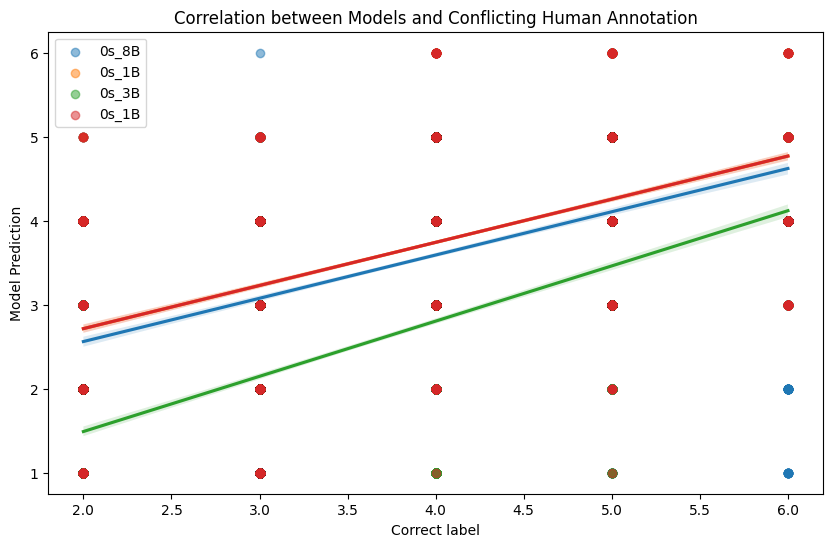

In [ ]:
# @title Correlation between CoT Models and Human Labels (label1)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# sns.regplot(x='label', y='cot_1B', data=df, label='cot_1B', scatter_kws={'alpha':0.5})
# sns.regplot(x='label', y='1s_1B', data=df, label='1s_1B', scatter_kws={'alpha':0.5})
sns.regplot(x='label', y='0s_chatGPT', data=differ_df, label='0s_chatGPT', scatter_kws={'alpha':0.5})
sns.regplot(x='label', y='0s_1B', data=differ_df, label='0s_1B', scatter_kws={'alpha':0.5})
sns.regplot(x='label', y='0s_3B', data=differ_df, label='0s_3B', scatter_kws={'alpha':0.5})
sns.regplot(x='label', y='0s_8B', data=differ_df, label='0s_8B', scatter_kws={'alpha':0.5})

plt.xlabel('Correct label')
plt.ylabel('Model Prediction')
plt.title('Correlation between Models and Conflicting Human Annotation')
_ = plt.legend()

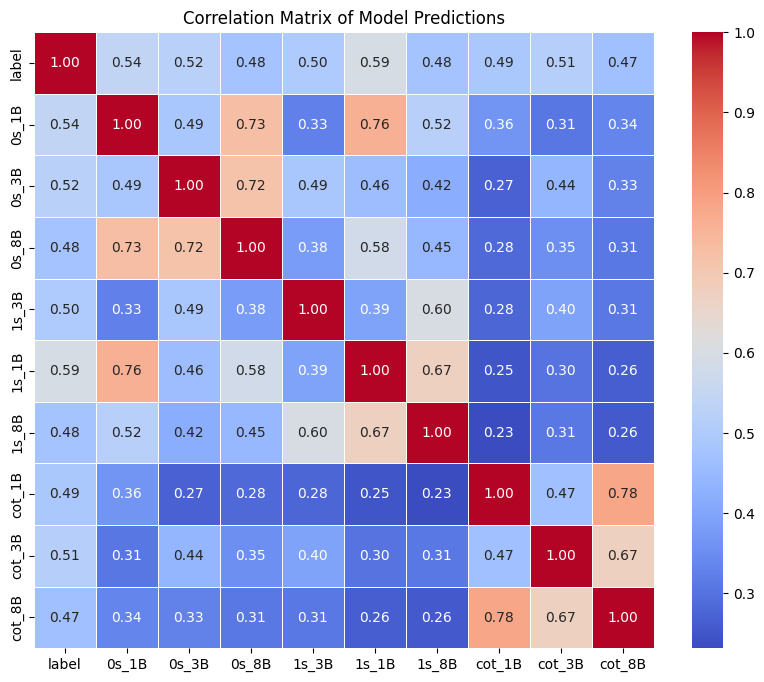

In [16]:
# @title Correlation Matrix of Model Predictions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_cols = ['label', '0s_1B', '0s_3B', '0s_8B', '1s_3B', '1s_1B', '1s_8B', 'cot_1B', 'cot_3B', 'cot_8B']
corr_matrix = df[model_cols].corr()

plt.figure(figsize=(10, 8))
graph = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
_ = plt.title('Correlation Matrix of Model Predictions')

In [17]:
df.head()

,sentence,label1,label2,0s_chatGPT,0s_1B,1s_1B,cot_1B,0s_3B,1s_3B,cot_3B,0s_8B,1s_8B,cot_8B,label,differ
0,There are three main types of chocolate : whit...,1,1,2,1,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1,0
1,He died on 6 October 1837 in Paris .,1,1,1,1,1.0,1,1.0,1.0,1.0,1,1.0,1.0,1,0
2,Nobbs died on 8 August 2015 aged 80 .,1,1,1,1,1.0,1,1.0,1.0,2.0,1,1.0,2.0,1,0
3,McAlpine died on 4 March 2018 at the age of 81 .,1,1,1,1,1.0,1,1.0,1.0,2.0,1,1.0,1.0,1,0
4,Ullsten died on 28 May 2018 at the age of 86 .,1,1,1,1,1.0,1,1.0,1.0,2.0,1,1.0,2.0,1,0
